In [1]:
import networkx as nx

import regraph.primitives as pr
from regraph import Rule, plot_rule
from regraph.neo4j import Neo4jGraph
from regraph.neo4j.cypher_utils import *

In [2]:
# initialize the neo4j driver, wrappped into Neo4jGraph object
g = Neo4jGraph(uri="bolt://localhost:7687", user="neo4j", password="admin")
# here we clear the db
res = g._clear()
nodes = [
    ("R", {"name": "Jack", "age": 23, "hobby": {"hiking", "music"}, "weight": 75}), 
    ("Sh2", {"name": "Bob", "age": 24, "hobby": {"sport", "music"}, "height": 178}), 
    ("P", {"name": "Paul"}), 
    ("S", {"name": "Roberto"})
]
edges = [
    ("R", "Sh2", {"type": {"friends", "colleagues"}}), 
    ("Sh2", "P", {"type": "enemies"}), 
    ("R", "P"),
    ("S", "P", {"type": "friends"}),
]
g.add_nodes_from(nodes)
g.add_edges_from(edges)

In [3]:
lhs = nx.DiGraph()
pr.add_nodes_from(lhs, [("a",  {"hobby": {"hiking", "music"}}), "b", "c"])
pr.add_edges_from(lhs, [("a", "b"), ("b", "c"), ("a", "c")])

In [4]:
p = nx.DiGraph()
pr.add_nodes_from(p, [("a1",  {"hobby": {"hiking"}}), ("a2",{"hobby": {"music"}}), "b1", "b2", "c1", "c2"])
pr.add_edges_from(p, [("a1", "b1"), ("b1", "c1"), ("a1", "c1"), ("a2", "b2"), ("b2", "c2"), ("a2", "c2")])

In [5]:
rule = Rule(p, lhs, p_lhs={"a1": "a", "a2": "a", "b1": "b", "b2": "b", "c1": "c", "c2": "c"})

/home/eugenia/anaconda3/envs/kami/lib/python3.6/site-packages/matplotlib-3.0.2-py3.6-linux-x86_64.egg/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


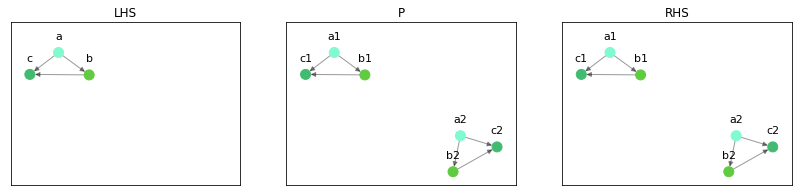

In [6]:
plot_rule(rule)

In [7]:
i = pr.find_matching(g, rule.lhs)

In [8]:
print(i)

[{'a': 'R', 'b': 'Sh2', 'c': 'P'}]


In [9]:
g.rewrite(rule, i[0])

{'a1': 'R',
 'b1': 'Sh2',
 'c2': '154740',
 'b2': '154739',
 'a2': '154738',
 'c1': 'P'}

In [10]:
rule.removed_edges()

{('a1', 'b2'),
 ('a1', 'c2'),
 ('a2', 'b1'),
 ('a2', 'c1'),
 ('b1', 'c2'),
 ('b2', 'c1')}